In [1]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from qsonar.load import load_data_from_internet, scale_and_split
from sklearn.metrics import classification_report, recall_score

In [2]:
SEED = 42

In [3]:
df = load_data_from_internet()

In [4]:
df

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f51,f52,f53,f54,f55,f56,f57,f58,f59,Y
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.515 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.515 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.515 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.515 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.441 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.515 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.606 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.485 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.545 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.500 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=pol

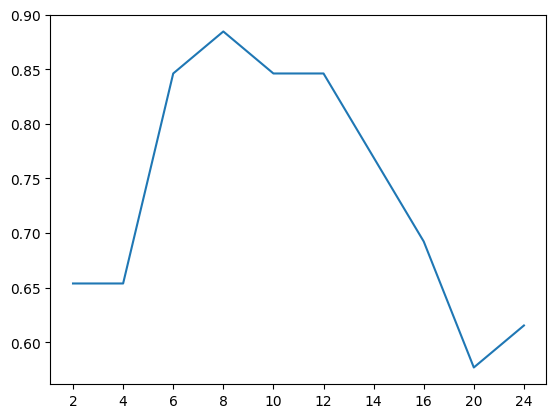

In [96]:
from sklearn.metrics import f1_score
results = {}
for c in [2, 4] + list(range(6, 17, 2)) + [20, 24]:
    X_train, X_test, y_train, y_test_true = scale_and_split(df, pca_components=c, random_state=SEED, test_size=0.2)
    svc = SVC(kernel='rbf')
    svc_grid_search = {
        'C': [0.1, 1, 10, 100, 1000],
        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
        'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
    }
    svc_grid = GridSearchCV(svc, svc_grid_search, cv=5, refit=True, verbose=3, scoring='accuracy')
    svc_grid.fit(X_train, y_train)
    
    svc = svc_grid.best_estimator_
    # svc.fit(X_train, y_train)
    
    y_test_pred = svc.predict(X_test)
    recall = recall_score(y_test_true, y_test_pred)
    accuracy = svc.score(X_test, y_test_true)
    f1 = f1_score(y_test_true, y_test_pred)
    
    results[str(c)] = {
        'best_params': str(svc_grid.best_params_),
        'recall': recall,
        'accuracy': accuracy,
        'best_score': svc_grid.best_score_,
        'f1': f1,
    }
    
    
import matplotlib.pyplot as plt

plt.plot(list(results.keys()), [results[k]['recall'] for k in results.keys()])

In [97]:
import json

with open('results.json', 'w') as f:
    json.dump(results, f)

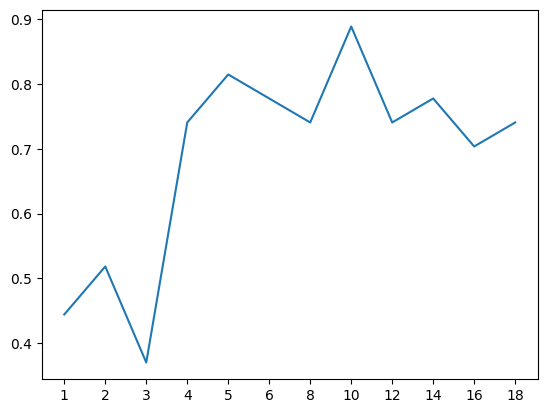

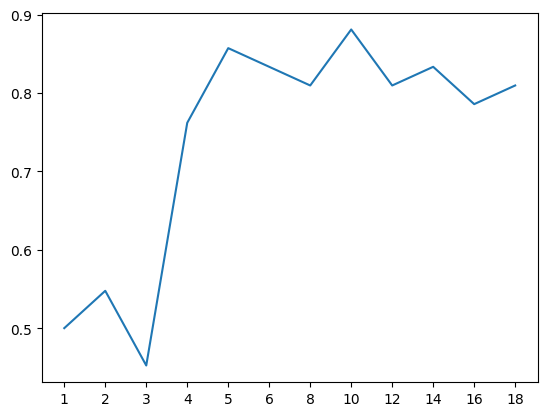

In [83]:
plt.plot(list(results.keys()), [results[k]['accuracy'] for k in results.keys()])

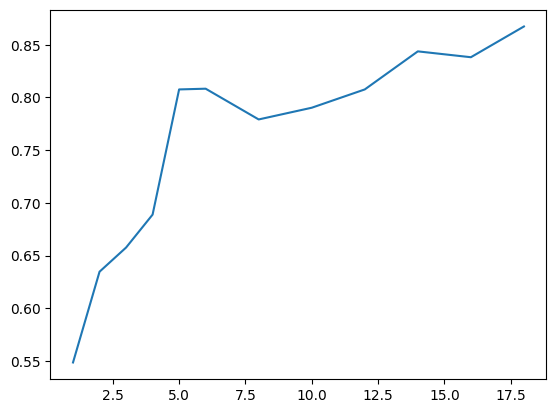

In [57]:
plt.plot(list(results.keys()), [results[k]['best_score'] for k in results.keys()])

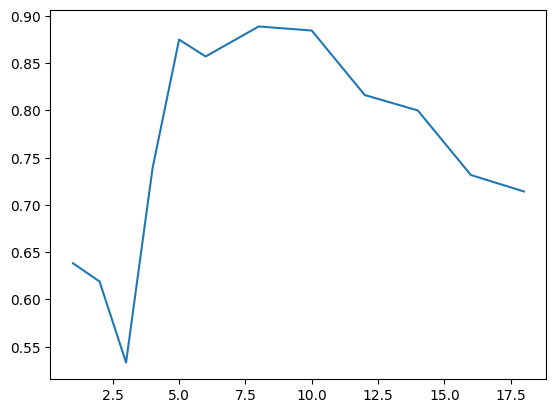

In [61]:
plt.plot(list(results.keys()), [results[k]['f1'] for k in results.keys()])

In [40]:
display(X_train.shape, X_test.shape, y_train.shape, y_test_true.shape)

(166, 2)

(42, 2)

(166,)

(42,)

## Simple SVC

In [41]:
svc = SVC(kernel='rbf')

In [42]:
svc.fit(X_train, y_train)

SVC()

In [43]:
y_test_pred = svc.predict(X_test)

In [44]:
recall_score(y_test_true, y_test_pred)

0.7727272727272727

In [32]:
print(classification_report(y_test_true, y_test_pred))

              precision    recall  f1-score   support

       False       0.82      0.70      0.76        20
        True       0.76      0.86      0.81        22

    accuracy                           0.79        42
   macro avg       0.79      0.78      0.78        42
weighted avg       0.79      0.79      0.78        42



## Grid Search

In [13]:
svc_grid_search = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}

In [14]:
svc = SVC()
# scoring = ['accuracy', 'precision', 'recall', 'f1']
# scoring = ['accuracy', 'recall']
scoring = 'accuracy'
# scoring = 'recall'
svc_grid = GridSearchCV(svc, svc_grid_search, cv=5, refit=True, verbose=3, scoring='accuracy')

In [15]:
svc_grid.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.529 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.545 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.545 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.545 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.515 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.706 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.848 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.758 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.697 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.727 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.765 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=pol

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
             scoring='accuracy', verbose=3)

In [16]:
svc_grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [17]:
# TODO fit the model with the best parameters on the whole training set

In [18]:
svc = svc_grid.best_estimator_

In [19]:
y_test_pred = svc.predict(X_test)



In [20]:
y_test_pred

array([False,  True, False, False,  True,  True,  True, False,  True,
       False,  True, False, False, False, False,  True, False,  True,
        True, False,  True,  True,  True, False,  True,  True,  True,
       False,  True, False,  True, False,  True,  True,  True,  True,
        True, False,  True, False,  True, False])

In [21]:
print(classification_report(y_test_true, y_test_pred))

              precision    recall  f1-score   support

       False       0.78      0.70      0.74        20
        True       0.75      0.82      0.78        22

    accuracy                           0.76        42
   macro avg       0.76      0.76      0.76        42
weighted avg       0.76      0.76      0.76        42



In [25]:
recall_score(y_test_true, y_test_pred)

0.8181818181818182

In [22]:
prob_svc = SVC(probability=True, **svc_grid.best_params_)

In [23]:
y_test_pred_prob = prob_svc.fit(X_train, y_train).predict_proba(X_test)
y_test_pred_prob


array([[9.57553548e-01, 4.24464515e-02],
       [4.08631341e-01, 5.91368659e-01],
       [7.58315832e-01, 2.41684168e-01],
       [9.39787040e-01, 6.02129600e-02],
       [5.44410574e-02, 9.45558943e-01],
       [3.86839645e-01, 6.13160355e-01],
       [3.51143541e-02, 9.64885646e-01],
       [7.50947877e-01, 2.49052123e-01],
       [4.48590875e-01, 5.51409125e-01],
       [9.38521214e-01, 6.14787861e-02],
       [4.13596078e-01, 5.86403922e-01],
       [8.81913465e-01, 1.18086535e-01],
       [8.90373079e-01, 1.09626921e-01],
       [9.99860926e-01, 1.39074376e-04],
       [9.65194623e-01, 3.48053770e-02],
       [5.98019876e-02, 9.40198012e-01],
       [9.89696775e-01, 1.03032248e-02],
       [3.87588802e-01, 6.12411198e-01],
       [3.27590245e-01, 6.72409755e-01],
       [8.79700270e-01, 1.20299730e-01],
       [9.12194847e-03, 9.90878052e-01],
       [2.58136344e-01, 7.41863656e-01],
       [2.05264508e-01, 7.94735492e-01],
       [6.31250174e-01, 3.68749826e-01],
       [1.011637

In [24]:
sum((y_test_true - y_test_pred_prob[:,1])**2)

7.139264381557077